"흡연 여부에 따라서 건강검진 수치가 달라지는지" 가설검증

In [1]:
from google.colab import drive

drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [3]:
plt.rc('font', family='NanumBarunGothic') 

In [4]:
# 데이터 로드

data = pd.read_csv('/gdrive/My Drive/데이터 분석/Data/국민건강보험공단_건강검진정보_20191231.csv', encoding='cp949')

In [5]:
data.shape

(1000000, 34)

In [6]:
data.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
0,2019,1,11,1,13,165,65,90.0,1.5,1.2,1.0,1.0,112.0,70.0,93.0,NaN,NaN,NaN,NaN,15.5,1.0,1.0,18.0,32.0,47.0,2.0,NaN,1,0.0,미시행,미시행,미시행,1.0,20191231
1,2019,2,48,2,5,155,45,64.0,1.2,0.5,1.0,1.0,114.0,76.0,89.0,NaN,NaN,NaN,NaN,14.0,1.0,0.5,15.0,8.0,13.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
2,2019,3,41,1,13,160,70,87.0,0.9,0.8,1.0,1.0,109.0,73.0,100.0,232.0,114.0,57.0,152.0,15.6,1.0,1.0,30.0,21.0,17.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
3,2019,4,28,1,12,170,60,85.0,0.4,1.2,1.0,1.0,131.0,85.0,85.0,NaN,NaN,NaN,NaN,14.5,1.0,0.7,17.0,19.0,32.0,2.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
4,2019,5,41,1,10,170,70,81.2,0.7,0.7,1.0,1.0,112.0,66.0,91.0,NaN,NaN,NaN,NaN,14.9,1.0,0.9,19.0,24.0,19.0,2.0,NaN,0,NaN,미시행,미시행,미시행,NaN,20191231


In [7]:
data.tail()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
999995,2019,999996,41,1,12,170,65,80.0,1.0,1.2,1.0,1.0,116.0,79.0,129.0,NaN,NaN,NaN,NaN,15.7,1.0,1.3,24.0,23.0,21.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
999996,2019,999997,11,1,9,170,55,75.0,0.9,0.8,1.0,1.0,99.0,61.0,130.0,157.0,50.0,54.0,93.0,15.4,2.0,0.9,16.0,15.0,27.0,2.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
999997,2019,999998,45,1,13,160,65,92.3,1.0,0.9,1.0,1.0,116.0,70.0,102.0,NaN,NaN,NaN,NaN,15.9,1.0,1.0,23.0,28.0,84.0,2.0,1.0,1,0.0,미시행,미시행,미시행,0.0,20191231
999998,2019,999999,30,1,8,170,75,85.0,0.8,0.8,1.0,1.0,112.0,71.0,89.0,NaN,NaN,NaN,NaN,15.3,1.0,1.0,25.0,65.0,29.0,2.0,1.0,1,0.0,미시행,미시행,미시행,0.0,20191231
999999,2019,1000000,11,2,10,155,65,86.0,0.5,0.5,1.0,1.0,118.0,73.0,67.0,NaN,NaN,NaN,NaN,13.2,1.0,0.7,20.0,16.0,9.0,1.0,NaN,1,0.0,미시행,미시행,미시행,1.0,20191231


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   기준년도           1000000 non-null  int64  
 1   가입자 일련번호       1000000 non-null  int64  
 2   시도코드           1000000 non-null  int64  
 3   성별코드           1000000 non-null  int64  
 4   연령대 코드(5세단위)   1000000 non-null  int64  
 5   신장(5Cm단위)      1000000 non-null  int64  
 6   체중(5Kg 단위)     1000000 non-null  int64  
 7   허리둘레           999597 non-null   float64
 8   시력(좌)          999805 non-null   float64
 9   시력(우)          999812 non-null   float64
 10  청력(좌)          999819 non-null   float64
 11  청력(우)          999822 non-null   float64
 12  수축기 혈압         994576 non-null   float64
 13  이완기 혈압         994575 non-null   float64
 14  식전혈당(공복혈당)     994477 non-null   float64
 15  총 콜레스테롤        333549 non-null   float64
 16  트리글리세라이드       333544 non-null   float64
 17  HDL 콜레스테롤

In [ ]:
data.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상',
       '치석', '데이터 공개일자'],
      dtype='object')

In [ ]:
data.dtypes

기준년도               int64
가입자 일련번호           int64
시도코드               int64
성별코드               int64
연령대 코드(5세단위)       int64
신장(5Cm단위)          int64
체중(5Kg 단위)         int64
허리둘레             float64
시력(좌)            float64
시력(우)            float64
청력(좌)            float64
청력(우)            float64
수축기 혈압           float64
이완기 혈압           float64
식전혈당(공복혈당)       float64
총 콜레스테롤          float64
트리글리세라이드         float64
HDL 콜레스테롤        float64
LDL 콜레스테롤        float64
혈색소              float64
요단백              float64
혈청크레아티닌          float64
(혈청지오티)AST       float64
(혈청지오티)ALT       float64
감마 지티피           float64
흡연상태             float64
음주여부             float64
구강검진 수검여부          int64
치아우식증유무          float64
결손치 유무            object
치아마모증유무           object
제3대구치(사랑니) 이상     object
치석               float64
데이터 공개일자           int64
dtype: object

In [ ]:
# 결측치 확인
data.isnull().sum()

기준년도                  0
가입자 일련번호              0
시도코드                  0
성별코드                  0
연령대 코드(5세단위)          0
신장(5Cm단위)             0
체중(5Kg 단위)            0
허리둘레                403
시력(좌)               195
시력(우)               188
청력(좌)               181
청력(우)               178
수축기 혈압             5424
이완기 혈압             5425
식전혈당(공복혈당)         5523
총 콜레스테롤          666451
트리글리세라이드         666456
HDL 콜레스테롤        666459
LDL 콜레스테롤        672852
혈색소                5532
요단백               10306
혈청크레아티닌            5526
(혈청지오티)AST         5522
(혈청지오티)ALT         5523
감마 지티피             5530
흡연상태                166
음주여부             355082
구강검진 수검여부             0
치아우식증유무          602320
결손치 유무                0
치아마모증유무               0
제3대구치(사랑니) 이상         0
치석               602320
데이터 공개일자              0
dtype: int64

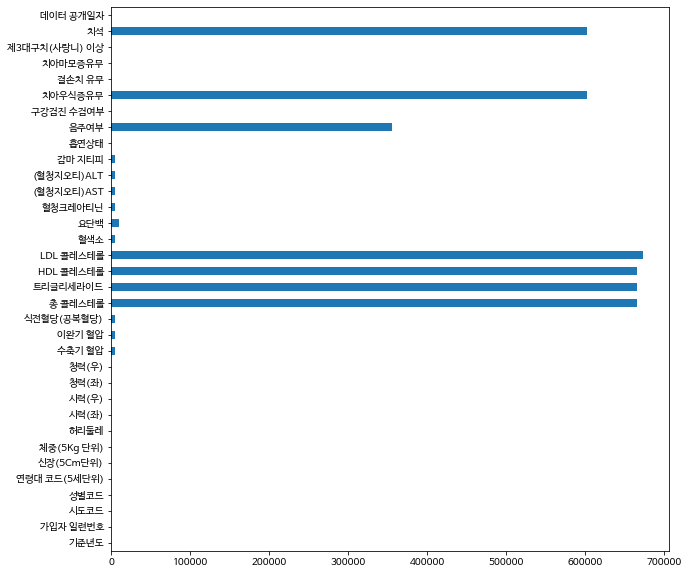

In [ ]:
data.isnull().sum().plot.barh(figsize=(10, 10))

In [ ]:
data[['(혈청지오티)ALT', '(혈청지오티)AST']].head()

,(혈청지오티)ALT,(혈청지오티)AST
0,32.0,18.0
1,8.0,15.0
2,21.0,30.0
3,19.0,17.0
4,24.0,19.0


In [ ]:
data[['(혈청지오티)ALT', '(혈청지오티)AST']].describe()

,(혈청지오티)ALT,(혈청지오티)AST
count,994477.000000,994478.000000
mean,25.996708,26.231107
std,27.710895,24.046478
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,30.000000,29.000000
max,6435.000000,7362.000000


In [ ]:
data['성별코드'].value_counts()

# 1: 남성, 2: 여성

1    519574
2    480426
Name: 성별코드, dtype: int64

In [ ]:
data['흡연상태'].value_counts()

# 1: 흡연, 2: 비흡연

1.0    630226
2.0    369608
Name: 흡연상태, dtype: int64

In [ ]:
data.groupby('성별코드')['가입자 일련번호'].count()

성별코드
1    519574
2    480426
Name: 가입자 일련번호, dtype: int64

In [ ]:
data.groupby(['성별코드', '흡연상태'])['가입자 일련번호'].count()

# 0.0: 음주 x, 1.0: 음주 o

성별코드  흡연상태
1     1.0     180257
      2.0     339250
2     1.0     449969
      2.0      30358
Name: 가입자 일련번호, dtype: int64

In [ ]:
data.groupby(['성별코드', '음주여부'])['감마 지티피'].mean()

성별코드  음주여부
1     0.0     26.000000
      1.0     52.159757
2     0.0     27.000000
      1.0     23.565117
Name: 감마 지티피, dtype: float64

In [ ]:
data.groupby(['성별코드', '음주여부'])['감마 지티피'].describe()

count       mean        std   min   25%   50%   75%    max
성별코드 음주여부                                                               
1    0.0        7.0  26.000000  12.897028  10.0  18.5  21.0  34.0   46.0
     1.0   400496.0  52.159757  62.807391   1.0  22.0  34.0  58.0  999.0
2    0.0       11.0  27.000000  15.968719   5.0  16.5  20.0  40.5   53.0
     1.0   243215.0  23.565117  31.881879   1.0  13.0  16.0  24.0  999.0

In [ ]:
data.groupby(['성별코드', '흡연상태'])['감마 지티피'].agg(['count', 'mean', 'median'])

count       mean  median
성별코드 흡연상태                           
1    1.0   179458  39.628721    27.0
     2.0   338133  52.872470    35.0
2    1.0   446653  22.726347    17.0
     2.0    30061  31.512391    20.0

In [ ]:
# Pivot Table

data.pivot_table(index='흡연상태', values='가입자 일련번호', aggfunc='count')

,가입자 일련번호
흡연상태,
1.0,630226
2.0,369608


In [ ]:
pd.pivot_table(data, index='흡연상태', values='감마 지티피', aggfunc=['mean', 'median'])

,mean,median
,감마 지티피,감마 지티피
흡연상태,,
1.0,27.570961,19.0
2.0,51.128538,33.0


In [ ]:
# 전체 데이터 시각화

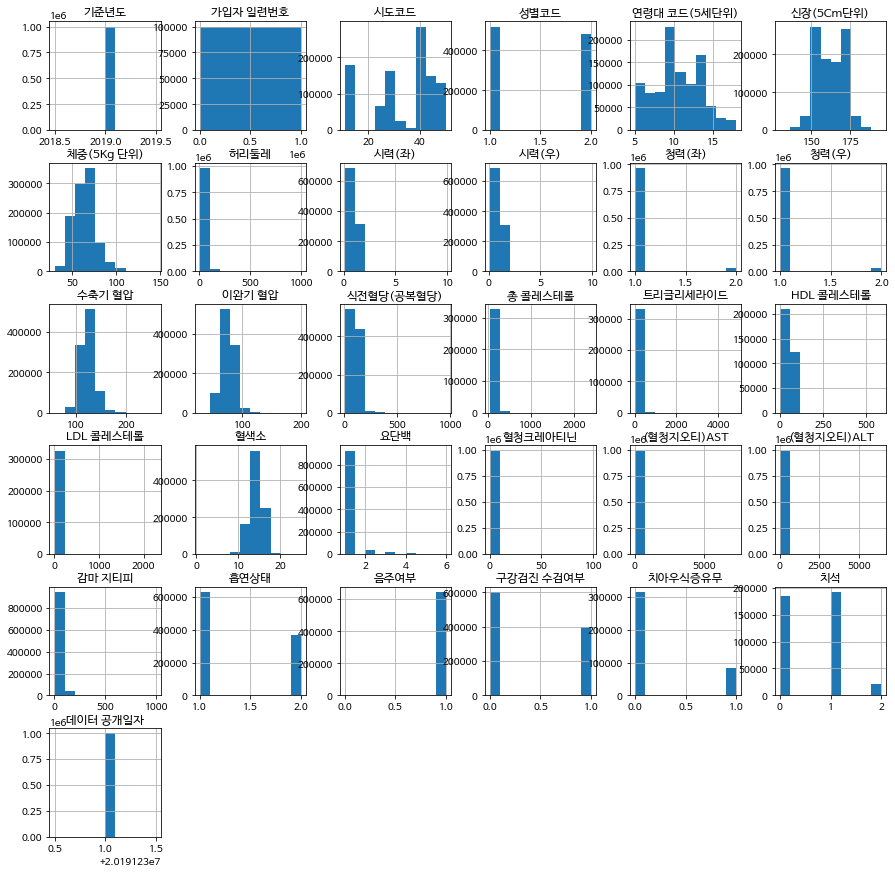

In [ ]:
g = data.hist(figsize=(15, 15))

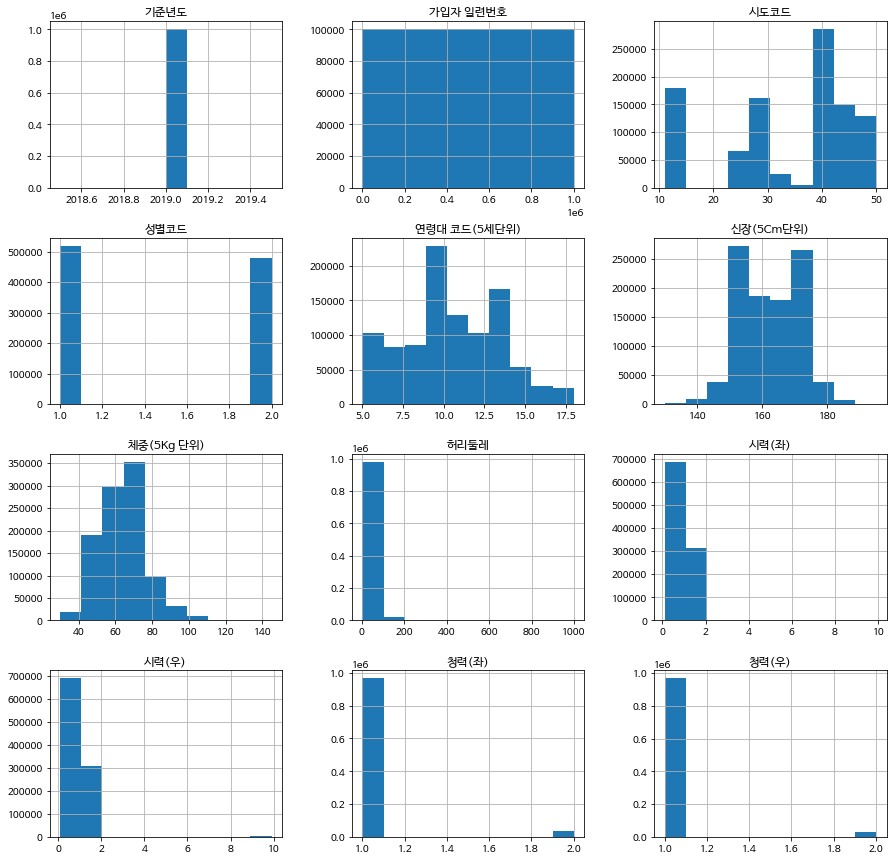

In [ ]:
g = data.iloc[:, :12].hist(figsize=(15, 15))

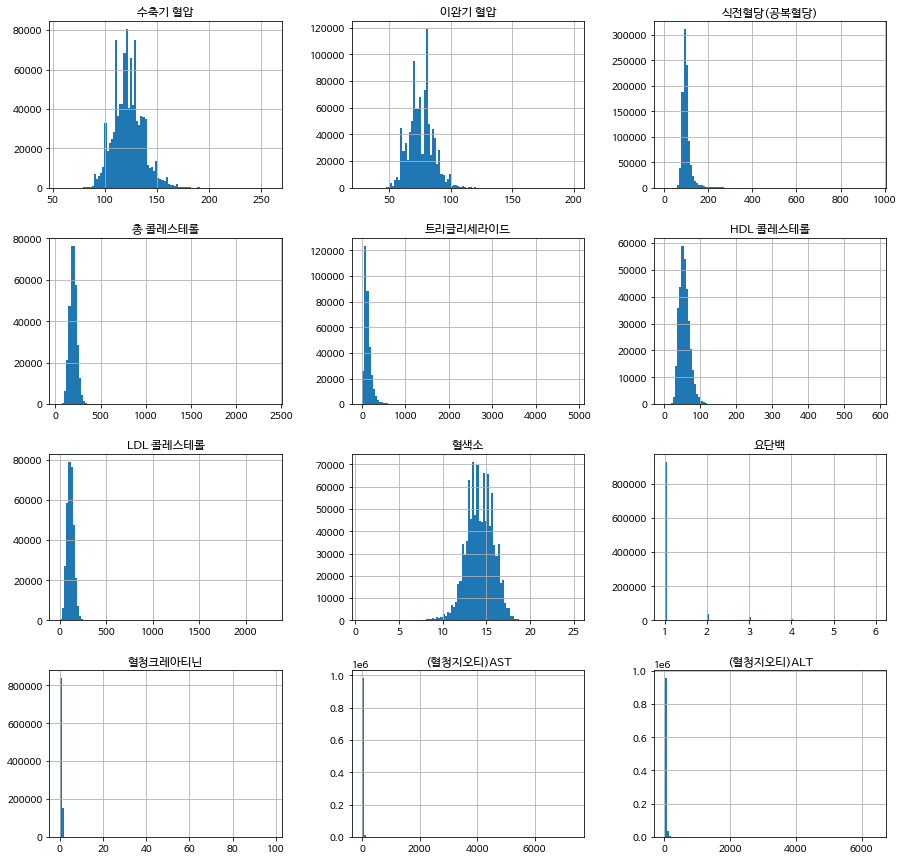

In [ ]:
g = data.iloc[:, 12:24].hist(figsize=(15, 15), bins=100)

In [14]:
data_sample = data.sample(1000, random_state=1)
data_sample.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
276826,2019,276827,11,1,11,160,65,86.0,1.2,1.5,1.0,1.0,140.0,90.0,102.0,NaN,NaN,NaN,NaN,15.1,1.0,0.8,38.0,17.0,19.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
849425,2019,849426,26,2,13,155,50,74.6,0.7,1.2,1.0,1.0,146.0,74.0,102.0,187.0,128.0,56.0,105.0,13.6,1.0,0.9,31.0,39.0,43.0,1.0,1.0,1,0.0,미시행,미시행,미시행,0.0,20191231
504499,2019,504500,11,2,7,160,45,63.2,1.5,1.5,1.0,1.0,103.0,63.0,96.0,NaN,NaN,NaN,NaN,12.6,1.0,0.6,17.0,8.0,12.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
601054,2019,601055,46,1,8,170,85,89.0,1.2,1.2,1.0,1.0,110.0,70.0,96.0,NaN,NaN,NaN,NaN,15.8,1.0,1.0,26.0,38.0,33.0,1.0,NaN,1,1.0,미시행,미시행,미시행,1.0,20191231
980221,2019,980222,41,1,9,185,75,86.5,1.0,0.5,1.0,1.0,118.0,86.0,93.0,150.0,59.0,60.0,78.0,16.5,1.0,0.8,46.0,64.0,44.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231


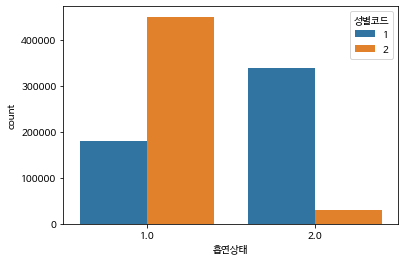

In [ ]:
sns.countplot(data=data, x='흡연상태', hue='성별코드')

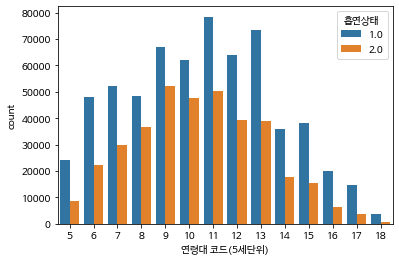

In [ ]:
sns.countplot(data=data, x='연령대 코드(5세단위)', hue='흡연상태')

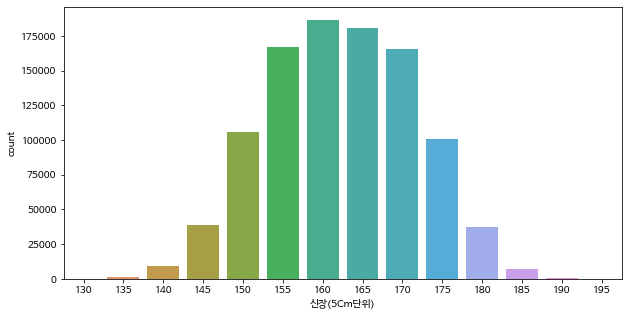

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='신장(5Cm단위)')
plt.show()

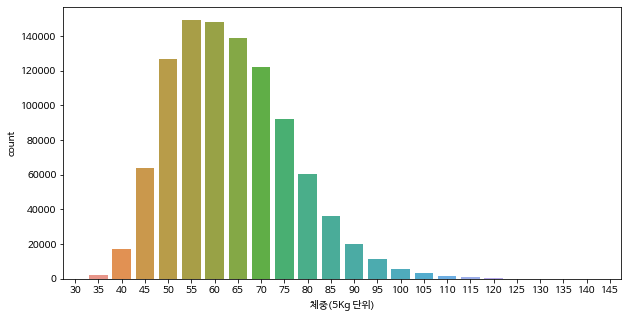

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='체중(5Kg 단위)')
plt.show()

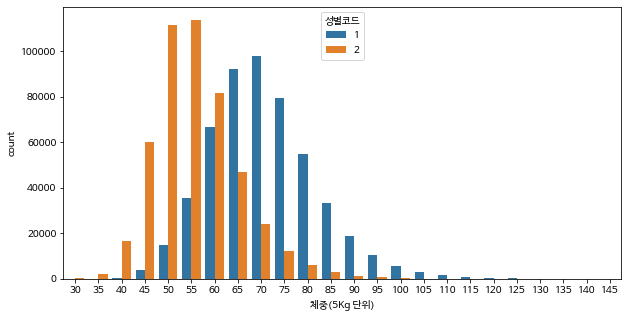

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='체중(5Kg 단위)', hue='성별코드')
plt.show()

In [ ]:
data.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상',
       '치석', '데이터 공개일자'],
      dtype='object')

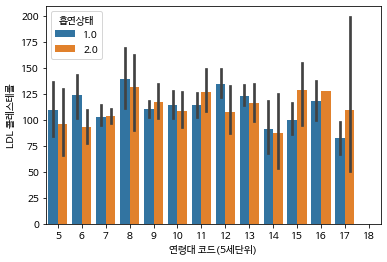

In [ ]:
sns.barplot(data=data_sample, x='연령대 코드(5세단위)', y='LDL 콜레스테롤', hue='흡연상태')

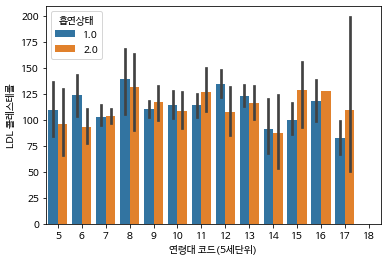

In [ ]:
sns.barplot(data=data_sample, x='연령대 코드(5세단위)', y='LDL 콜레스테롤', hue='흡연상태')

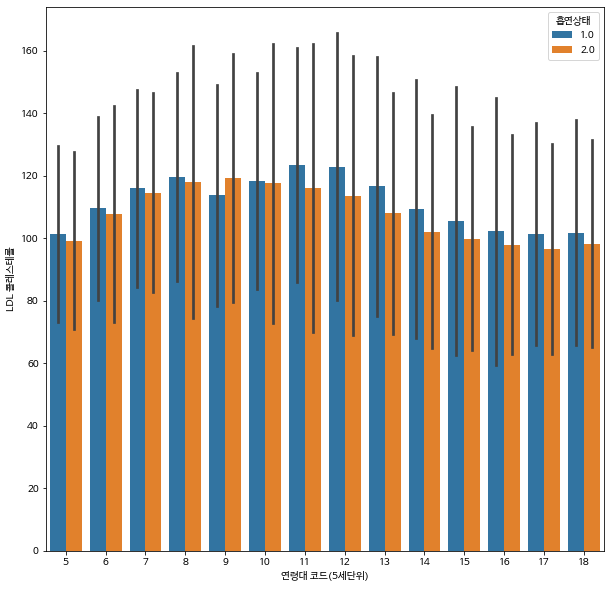

In [ ]:
plt.figure(figsize=(10, 10))
sns.barplot(data=data, x='연령대 코드(5세단위)', y='LDL 콜레스테롤', hue='흡연상태', ci='sd')
plt.show()
# ci: 신뢰구간

In [ ]:
data.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상',
       '치석', '데이터 공개일자'],
      dtype='object')

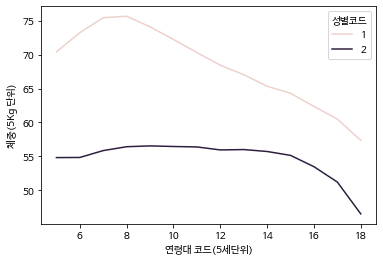

In [ ]:
sns.lineplot(data=data, x='연령대 코드(5세단위)', y='체중(5Kg 단위)', hue='성별코드', ci=None)

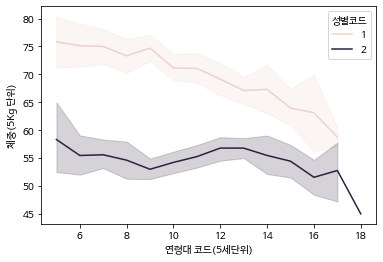

In [ ]:
sns.lineplot(data=data_sample, x='연령대 코드(5세단위)', y='체중(5Kg 단위)', hue='성별코드')

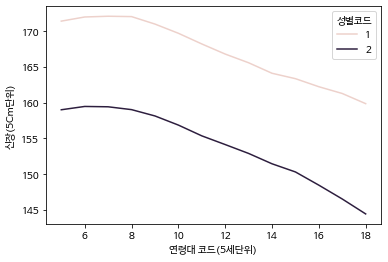

In [ ]:
sns.lineplot(data=data, x='연령대 코드(5세단위)', y='신장(5Cm단위)', hue='성별코드', ci=None)

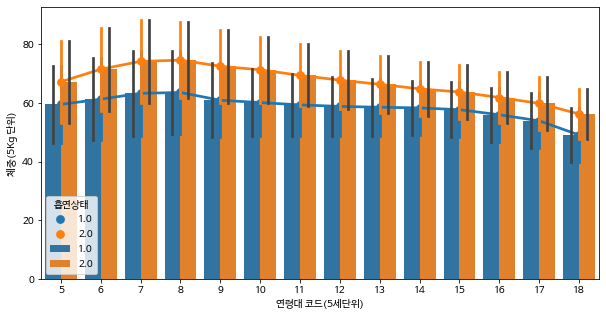

In [ ]:
plt.figure(figsize=(10, 5))
sns.pointplot(data=data, x='연령대 코드(5세단위)', y='체중(5Kg 단위)', hue='흡연상태', ci='sd')
sns.barplot(data=data, x='연령대 코드(5세단위)', y='체중(5Kg 단위)', hue='흡연상태', ci='sd')
plt.show()

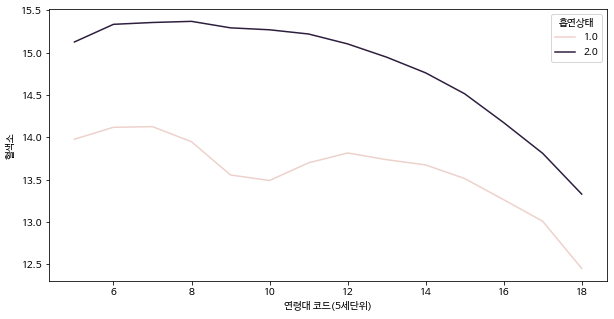

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x='연령대 코드(5세단위)', y='혈색소', hue='흡연상태', ci=None)
plt.show()

In [ ]:
data.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상',
       '치석', '데이터 공개일자'],
      dtype='object')

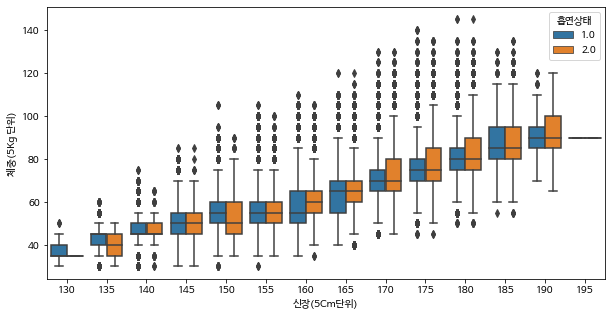

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='신장(5Cm단위)', y='체중(5Kg 단위)', hue='흡연상태')
plt.show()

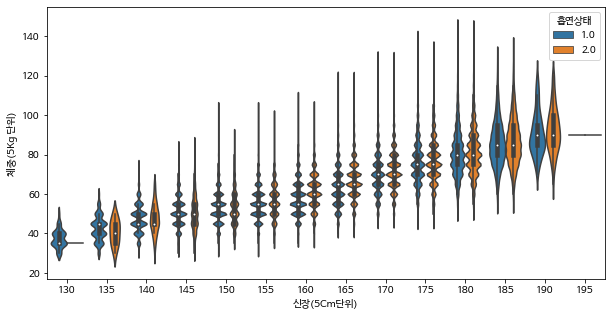

In [ ]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=data, x='신장(5Cm단위)', y='체중(5Kg 단위)', hue='흡연상태')
plt.show()

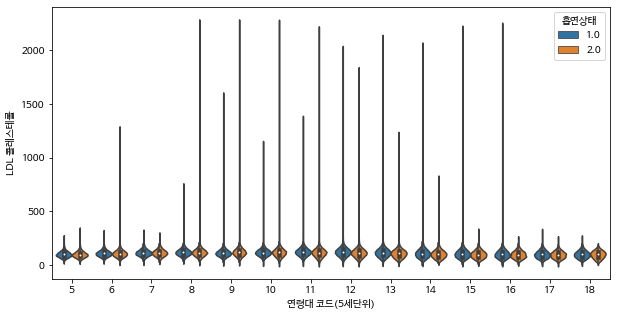

In [10]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=data, x='연령대 코드(5세단위)', y='LDL 콜레스테롤', hue='흡연상태', split=False)
plt.show()


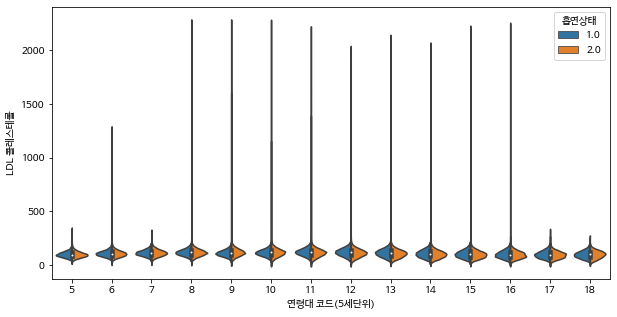

In [11]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=data, x='연령대 코드(5세단위)', y='LDL 콜레스테롤', hue='흡연상태', split=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 63.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 60.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 56.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 54.3% of the points cannot be placed; y

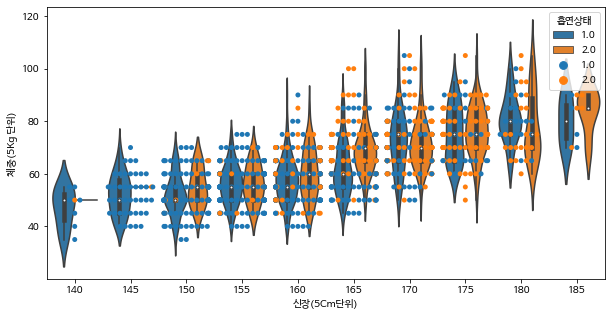

In [15]:
plt.figure(figsize=(10, 5))
sns.swarmplot(data=data_sample, x='신장(5Cm단위)', y='체중(5Kg 단위)', hue='흡연상태')
sns.violinplot(data=data_sample, x='신장(5Cm단위)', y='체중(5Kg 단위)', hue='흡연상태')
plt.show()

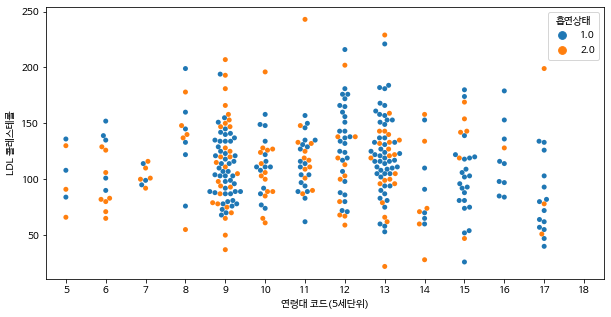

In [17]:
plt.figure(figsize=(10, 5))
sns.swarmplot(data=data_sample, x='연령대 코드(5세단위)', y='LDL 콜레스테롤', hue='흡연상태')
plt.show()

<Figure size 720x360 with 0 Axes>

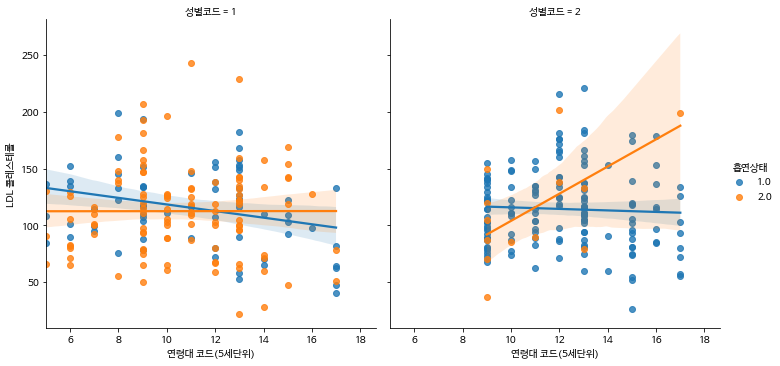

In [21]:
plt.figure(figsize=(10, 5))
sns.lmplot(data=data_sample, x='연령대 코드(5세단위)', y='LDL 콜레스테롤', hue='흡연상태', col='성별코드')
plt.show()

In [22]:
data.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상',
       '치석', '데이터 공개일자'],
      dtype='object')

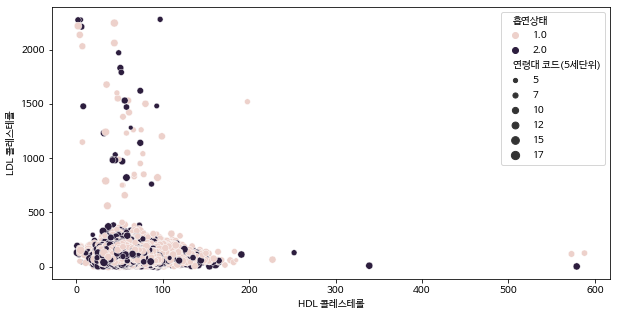

In [25]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='HDL 콜레스테롤', y='LDL 콜레스테롤', hue='흡연상태', size='연령대 코드(5세단위)')
plt.show()

<Figure size 720x360 with 0 Axes>

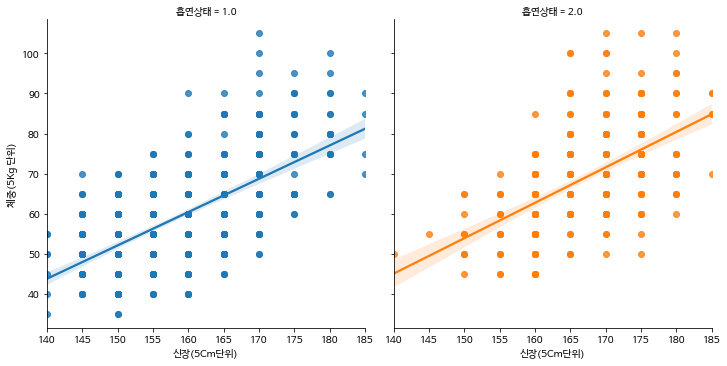

In [29]:
plt.figure(figsize=(10, 5))
sns.lmplot(data=data_sample, x='신장(5Cm단위)', y='체중(5Kg 단위)', hue='흡연상태', col='흡연상태')
plt.show()

<Figure size 720x360 with 0 Axes>

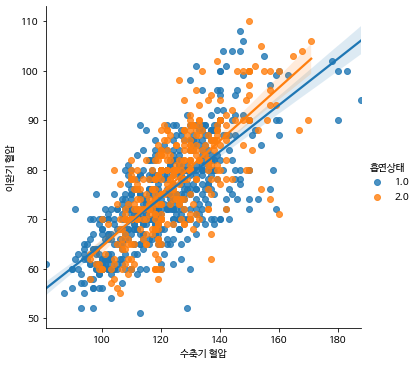

In [32]:
plt.figure(figsize=(10, 5))
sns.lmplot(data=data_sample, x='수축기 혈압', y='이완기 혈압', hue='흡연상태')
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 720x360 with 0 Axes>

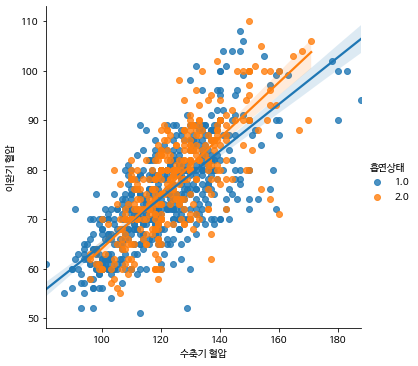

In [33]:
plt.figure(figsize=(10, 5))
sns.lmplot(data=data_sample, x='수축기 혈압', y='이완기 혈압', hue='흡연상태', robust=Trueb  )
plt.show()

In [36]:
data_ASLT = data_sample[(data_sample['(혈청지오티)AST']<400) & (data_sample['(혈청지오티)ALT']<400)]
data_ASLT

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
276826,2019,276827,11,1,11,160,65,86.0,1.2,1.5,1.0,1.0,140.0,90.0,102.0,NaN,NaN,NaN,NaN,15.1,1.0,0.8,38.0,17.0,19.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
849425,2019,849426,26,2,13,155,50,74.6,0.7,1.2,1.0,1.0,146.0,74.0,102.0,187.0,128.0,56.0,105.0,13.6,1.0,0.9,31.0,39.0,43.0,1.0,1.0,1,0.0,미시행,미시행,미시행,0.0,20191231
504499,2019,504500,11,2,7,160,45,63.2,1.5,1.5,1.0,1.0,103.0,63.0,96.0,NaN,NaN,NaN,NaN,12.6,1.0,0.6,17.0,8.0,12.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
601054,2019,601055,46,1,8,170,85,89.0,1.2,1.2,1.0,1.0,110.0,70.0,96.0,NaN,NaN,NaN,NaN,15.8,1.0,1.0,26.0,38.0,33.0,1.0,NaN,1,1.0,미시행,미시행,미시행,1.0,20191231
980221,2019,980222,41,1,9,185,75,86.5,1.0,0.5,1.0,1.0,118.0,86.0,93.0,150.0,59.0,60.0,78.0,16.5,1.0,0.8,46.0,64.0,44.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890013,2019,890014,11,1,9,165,75,88.0,1.0,1.0,1.0,1.0,137.0,91.0,109.0,NaN,NaN,NaN,NaN,14.7,4.0,0.8,21.0,27.0,43.0,1.0,1.0,1,0.0,미시행,미시행,미시행,0.0,20191231
875389,2019,875390,41,1,6,170,70,79.6,1.0,0.9,1.0,1.0,114.0,74.0,93.0,208.0,77.0,58.0,135.0,16.0,1.0,0.9,25.0,26.0,22.0,1.0,1.0,1,1.0,미시행,미시행,미시행,2.0,20191231
358458,2019,358459,47,1,13,165,65,85.0,1.5,1.2,1.0,1.0,135.0,83.0,106.0,NaN,NaN,NaN,NaN,17.5,1.0,1.0,40.0,58.0,75.0,2.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
808228,2019,808229,41,1,10,165,70,84.0,0.8,1.0,1.0,1.0,110.0,82.0,90.0,NaN,NaN,NaN,NaN,14.8,1.0,1.2,27.0,36.0,30.0,2.0,1.0,1,0.0,미시행,미시행,미시행,0.0,20191231


<Figure size 720x360 with 0 Axes>

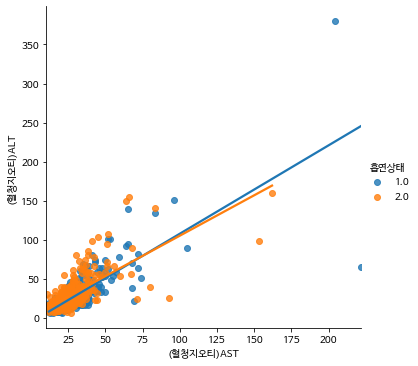

In [39]:
plt.figure(figsize=(10, 5))
sns.lmplot(data=data_ASLT, x='(혈청지오티)AST', y='(혈청지오티)ALT', hue='흡연상태', ci=None)
plt.show()

In [47]:
data_chol = data.loc[data['총 콜레스테롤'].notnull(), '총 콜레스테롤']
data_chol

2         232.0
5         215.0
6         148.0
10        193.0
12        252.0
          ...  
999990    256.0
999991    233.0
999993    184.0
999994    245.0
999996    157.0
Name: 총 콜레스테롤, Length: 333549, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


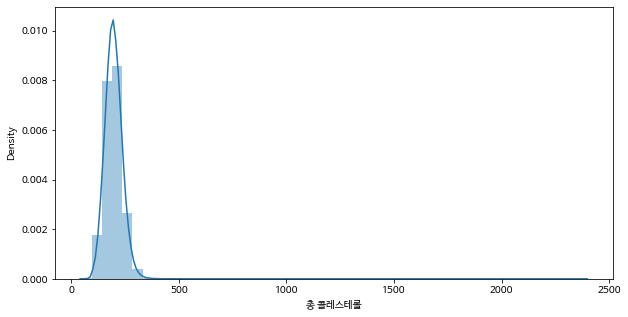

In [49]:
plt.figure(figsize=(10, 5))
sns.distplot(data_chol)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


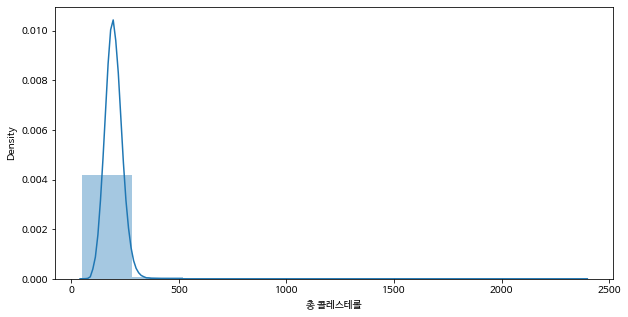

In [50]:
plt.figure(figsize=(10, 5))
sns.distplot(data_chol, bins=10)
plt.show()

In [51]:
data[data['총 콜레스테롤'].notnull() & data['흡연상태']==1]

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
2,2019,3,41,1,13,160,70,87.0,0.9,0.8,1.0,1.0,109.0,73.0,100.0,232.0,114.0,57.0,152.0,15.6,1.0,1.0,30.0,21.0,17.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
5,2019,6,11,1,8,170,110,107.8,1.2,1.5,1.0,1.0,139.0,87.0,108.0,215.0,142.0,37.0,150.0,14.8,1.0,0.9,42.0,44.0,129.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
6,2019,7,41,1,6,175,70,81.3,0.9,1.0,1.0,1.0,120.0,72.0,90.0,148.0,51.0,45.0,93.0,13.1,1.0,0.9,14.0,11.0,30.0,2.0,1.0,1,0.0,미시행,미시행,미시행,0.0,20191231
10,2019,11,41,1,11,170,75,86.5,0.7,0.2,1.0,1.0,140.0,80.0,87.0,193.0,144.0,42.0,122.0,13.9,1.0,1.1,21.0,22.0,37.0,2.0,NaN,0,NaN,미시행,미시행,미시행,NaN,20191231
12,2019,13,47,2,11,150,65,94.0,1.2,1.0,1.0,1.0,123.0,69.0,82.0,252.0,163.0,43.0,176.0,13.9,1.0,0.8,22.0,13.0,39.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999990,2019,999991,45,2,17,155,60,82.2,0.8,0.6,1.0,1.0,128.0,74.0,107.0,256.0,188.0,50.0,168.0,13.9,1.0,0.8,22.0,18.0,13.0,1.0,NaN,0,NaN,미시행,미시행,미시행,NaN,20191231
999991,2019,999992,43,1,13,165,70,89.0,2.0,1.5,1.0,1.0,138.0,88.0,118.0,233.0,152.0,48.0,155.0,15.1,1.0,0.9,20.0,23.0,26.0,1.0,NaN,1,0.0,미시행,미시행,미시행,0.0,20191231
999993,2019,999994,28,1,12,165,55,73.0,1.5,1.5,1.0,1.0,125.0,76.0,85.0,184.0,176.0,57.0,112.0,14.7,1.0,0.8,36.0,43.0,31.0,2.0,NaN,1,0.0,미시행,미시행,미시행,0.0,20191231
999994,2019,999995,11,2,11,155,60,81.3,0.5,0.6,1.0,1.0,108.0,65.0,88.0,245.0,47.0,54.0,182.0,12.1,1.0,0.6,25.0,17.0,24.0,1.0,NaN,0,NaN,미시행,미시행,미시행,NaN,20191231


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


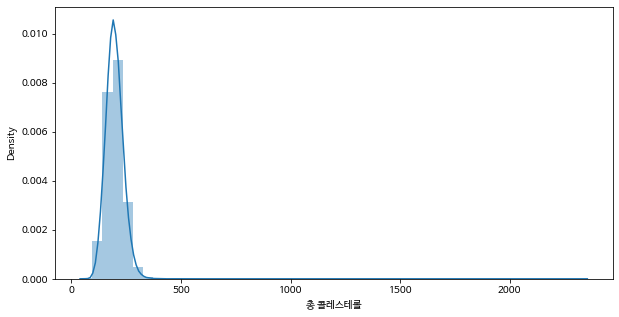

In [57]:
plt.figure(figsize=(10, 5))
sns.distplot(data.loc[data['총 콜레스테롤'].notnull() & (data['흡연상태']==1), '총 콜레스테롤'])
plt.show()

In [58]:
columns = data.columns

In [59]:
data_small = data_sample[columns]
data_corr = data_small.corr()
data_corr

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),총 콜레스테롤,트리글리세라이드,HDL 콜레스테롤,LDL 콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
기준년도,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
가입자 일련번호,NaN,1.000000,-0.000394,0.056684,0.004908,-0.048301,-0.063079,-0.033286,0.005553,0.002666,-0.040081,-0.050827,-0.108827,-0.081572,-0.012696,-0.016589,-0.094804,0.045342,-0.008313,-0.022277,0.006017,-0.041482,0.047139,0.026061,0.001366,-0.039894,NaN,0.016172,0.010516,0.031982,NaN
시도코드,NaN,-0.000394,1.000000,-0.018601,0.011356,0.000243,0.023277,0.026411,0.034925,0.006494,-0.034227,-0.060510,0.018373,0.025259,-0.004813,0.065786,0.057408,-0.054207,0.073211,0.028115,-0.024119,-0.009186,0.009718,0.004668,0.083604,0.041359,NaN,0.000038,0.009502,-0.105870,NaN
성별코드,NaN,0.056684,-0.018601,1.000000,0.046860,-0.712136,-0.621038,-0.480748,-0.092187,-0.098469,-0.030274,0.009180,-0.214891,-0.246266,-0.179757,0.058166,-0.268097,0.385308,0.011889,-0.670784,-0.079243,-0.588875,-0.094016,-0.202473,-0.238487,-0.597620,NaN,-0.041692,-0.088246,-0.119991,NaN
연령대 코드(5세단위),NaN,0.004908,0.011356,0.046860,1.000000,-0.393332,-0.188281,0.172149,-0.241231,-0.131303,0.286197,0.243370,0.296009,0.108078,0.235578,-0.050117,-0.026392,-0.018992,-0.053121,-0.123569,0.037785,0.040688,0.157940,0.027034,0.047599,-0.061987,NaN,-0.175997,-0.081503,-0.073249,NaN
신장(5Cm단위),NaN,-0.048301,0.000243,-0.712136,-0.393332,1.000000,0.672424,0.335515,0.141849,0.104431,-0.127582,-0.117482,0.030530,0.121531,0.034262,0.000989,0.141962,-0.230358,0.034606,0.513767,0.038459,0.448009,-0.016769,0.124098,0.141222,0.452734,NaN,0.103165,0.088343,0.086704,NaN
체중(5Kg 단위),NaN,-0.063079,0.023277,-0.621038,-0.188281,0.672424,1.000000,0.794732,0.078121,0.075704,-0.086121,-0.073677,0.253945,0.292474,0.166706,0.072708,0.318741,-0.363150,0.095703,0.560006,0.065149,0.371616,0.133416,0.306282,0.230250,0.382786,NaN,0.050490,0.048163,0.086606,NaN
허리둘레,NaN,-0.033286,0.026411,-0.480748,0.172149,0.335515,0.794732,1.000000,-0.007002,0.016378,0.036707,0.031502,0.346283,0.317579,0.243604,0.086678,0.312697,-0.335147,0.092471,0.453203,0.085084,0.285112,0.186985,0.296242,0.235044,0.296416,NaN,-0.010156,0.026037,0.057625,NaN
시력(좌),NaN,0.005553,0.034925,-0.092187,-0.241231,0.141849,0.078121,-0.007002,1.000000,0.224399,-0.090133,-0.111144,-0.032942,0.034916,-0.053769,0.057166,0.064933,0.089427,0.001034,0.101431,-0.043459,-0.016510,-0.040148,0.009043,0.056092,0.060419,NaN,-0.006896,0.060306,0.009889,NaN
시력(우),NaN,0.002666,0.006494,-0.098469,-0.131303,0.104431,0.075704,0.016378,0.224399,1.000000,-0.013709,-0.092298,-0.030069,0.002762,-0.064436,0.058180,0.048644,-0.044144,0.060604,0.110770,-0.051236,0.088103,-0.033954,0.014002,0.020437,0.045302,NaN,0.037018,0.070752,0.020929,NaN


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


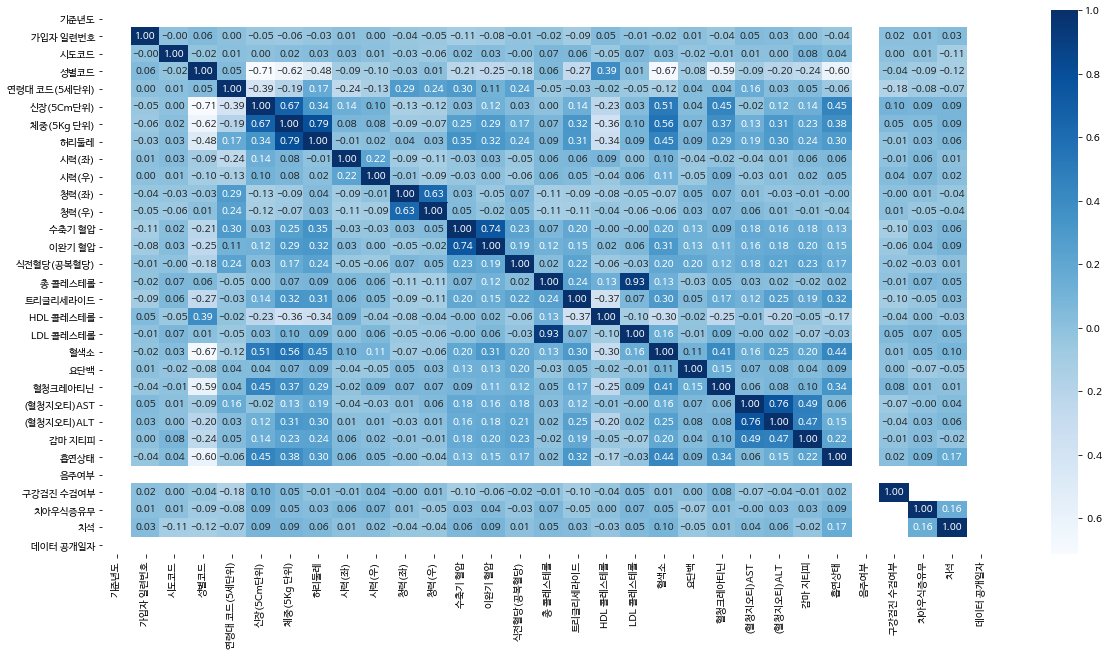

In [62]:
plt.figure(figsize=(20, 10))
sns.heatmap(data=data_corr, annot=True, fmt='.2f', cmap='Blues')

# annot: 숫자 표시, fmt: 소수점 표시

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


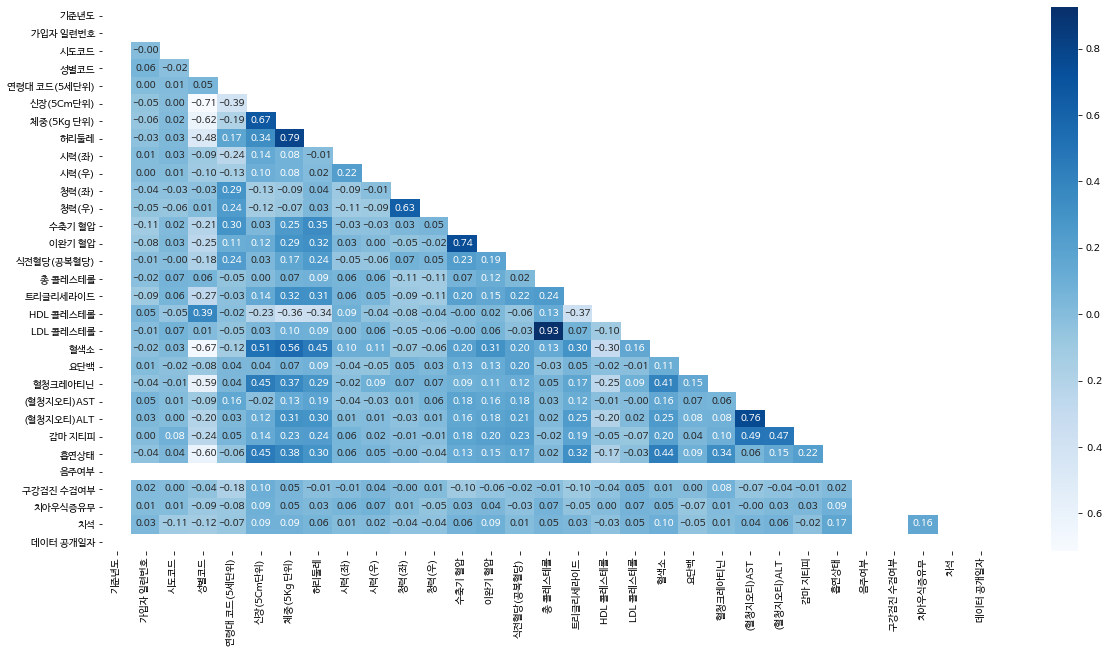

In [64]:
mask = np.triu(np.ones_like(data_corr, dtype=np.bool))
plt.figure(figsize=(20, 10))
sns.heatmap(data=data_corr, annot=True, fmt='.2f', cmap='Blues', mask=mask)